In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats
from glob import glob
from zimp.pos.statistics_analyzer import TextLengthAnalyzer

plt.style.use('seaborn-whitegrid')

## Certainty vs p_true

In [2]:
def plot_certainty_ptrue(df, title):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 1, 1)
    df.groupby('p_true').boxplot(ax=ax, column='mean', subplots=False, showfliers=False)
    ax.set_title(title)
    ax.set_xticks(range(1,12), [x/10 for x in range(11)])
    ax.set_xlabel('Ratio of runs with correct classification')
    ax.set_ylabel('Average confidence')
    plt.show()

In [3]:
def get_ds_language(ds):
    if ds in ['10K-GNAD', 'GERMEVAL-2018', 'GERMEVAL-2020']:
        return 'de'
    return 'en'

rs = []
for file in glob('confidence/confidence*.csv'):
    df = pd.read_csv(file)
    rs.append({
        'pearson': scipy.stats.pearsonr(df['p_true'], df['mean'])[0],
        'spearman': scipy.stats.spearmanr(df['p_true'], df['mean'])[0],
        'model': '_'.join(file.split('_')[1:-2]),
        'dataset': file.split('_')[-2],
        'train_test': file.split('_')[-1].split('.')[0],
        'language': get_ds_language(file.split('_')[-2])
    }) 
    
df_corr = pd.DataFrame(rs)
df_corr

,pearson,spearman,model,dataset,train_test,language
0,0.458710,0.172518,BERT,DBP-14,test,en
1,0.474898,0.180651,BERT,DBP-14,train,en
2,0.472770,0.517432,BERT,TREC-6,test,en
3,0.465288,0.498367,BERT,TREC-6,train,en
4,0.320615,0.310448,BERT,YELP-5,test,en
5,0.329640,0.313733,BERT,YELP-5,train,en
6,0.487148,0.483379,DECISION_TREE,10K-GNAD,test,de
7,0.485133,0.483042,DECISION_TREE,10K-GNAD,train,de
8,0.583404,0.567880,DECISION_TREE,DBP-14,test,en
9,0.587384,0.569023,DECISION_TREE,DBP-14,train,en


In [4]:
df_corr.groupby(['model'])[['pearson', 'spearman']].mean()

,pearson,spearman
model,,
BERT,0.420320,0.332192
DECISION_TREE,0.392035,0.381081
FASTTEXT,0.389084,0.363027
GERMAN_BERT,0.398655,0.487887
RANDOM_FOREST,0.460537,0.424998
SVM,0.180072,0.213211


In [5]:
df_corr.groupby(['language'])[['pearson', 'spearman']].mean()

,pearson,spearman
language,,
de,0.340175,0.376295
en,0.392312,0.340648


In [6]:
df_corr.groupby(['train_test'])[['pearson', 'spearman']].mean()

,pearson,spearman
train_test,,
test,0.368068,0.363041
train,0.364418,0.353902


In [7]:
df_corr.groupby(['dataset'])[['pearson', 'spearman']].mean()

,pearson,spearman
dataset,,
10K-GNAD,0.431316,0.464436
DBP-14,0.458239,0.325284
GERMEVAL-2018,0.261074,0.286252
GERMEVAL-2020,0.328134,0.378195
TREC-6,0.469817,0.466623
YELP-5,0.248879,0.230037


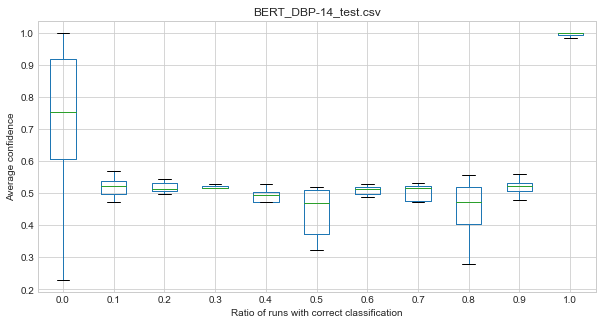

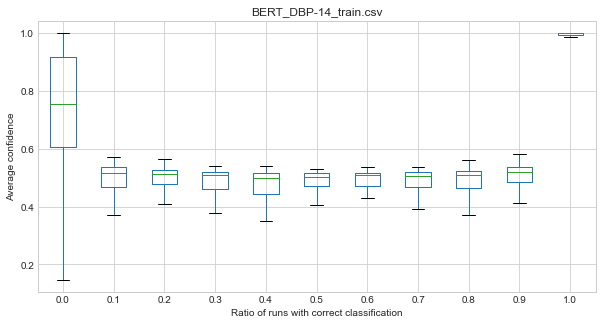

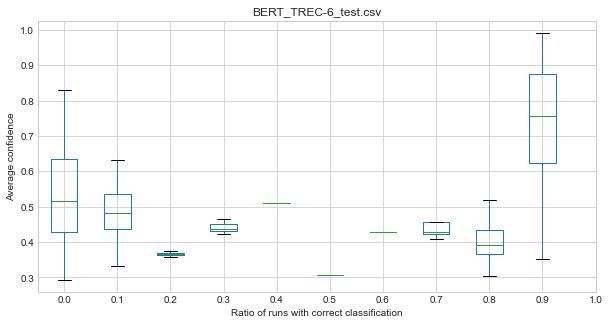

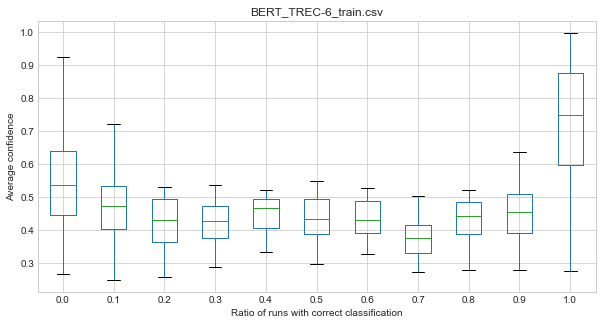

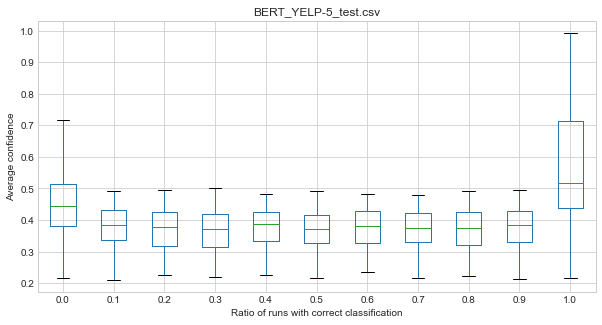

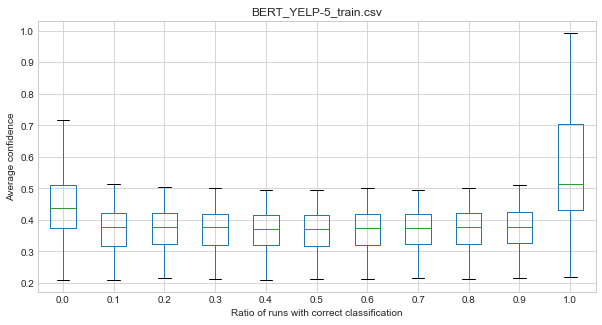

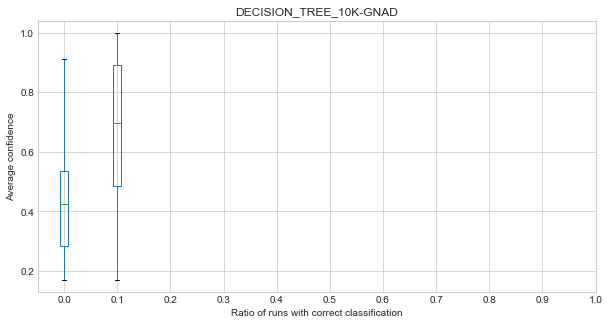

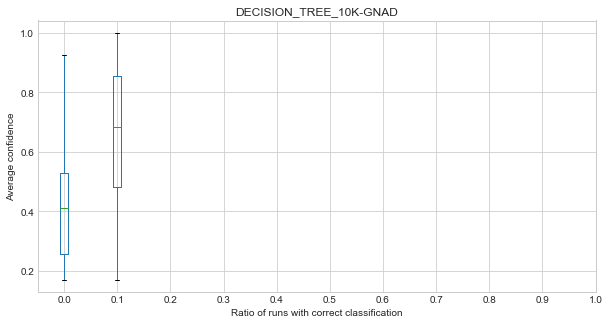

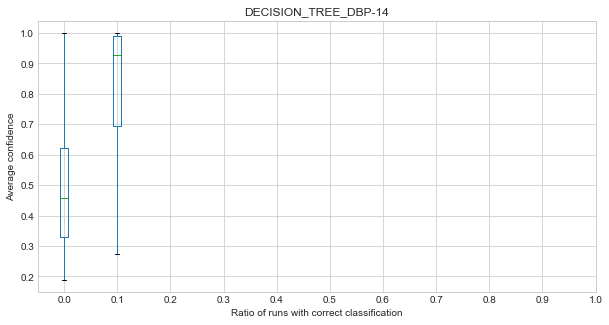

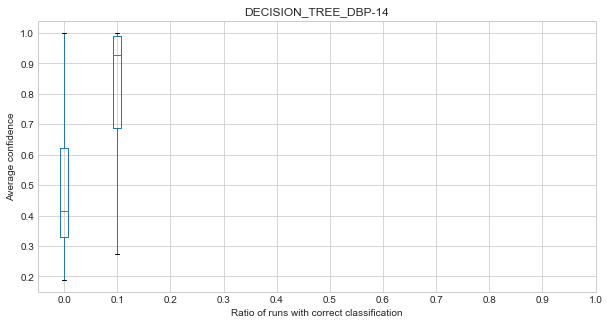

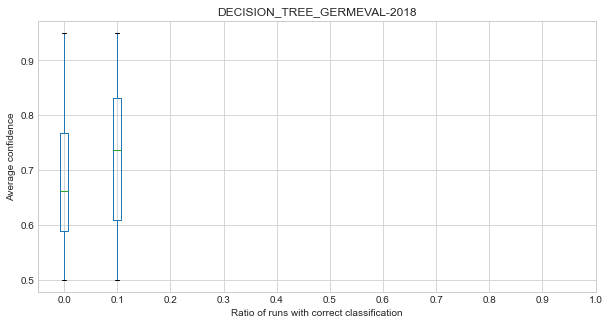

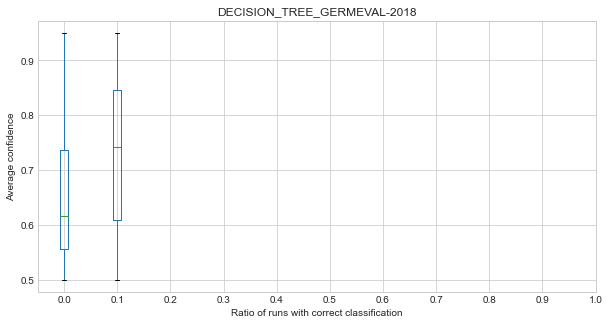

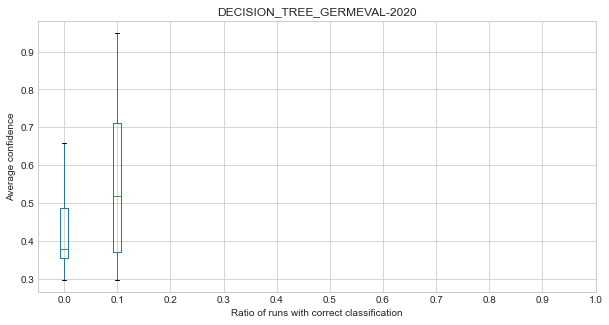

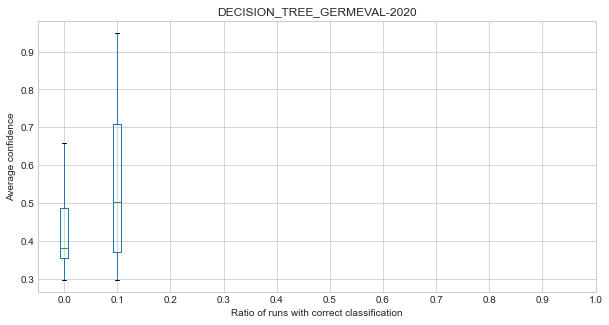

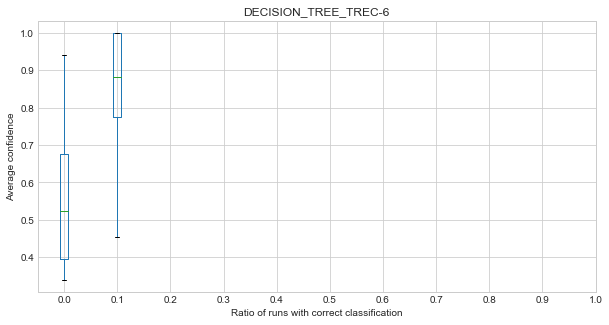

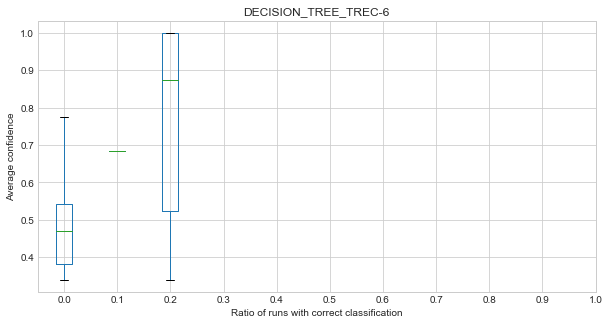

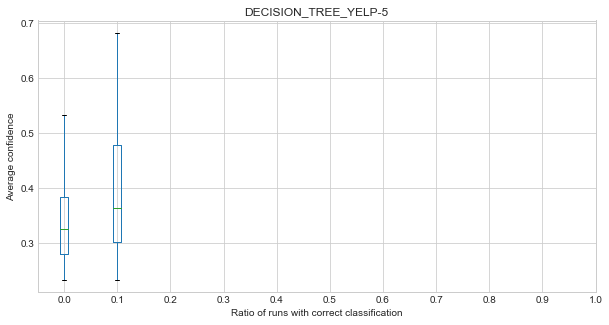

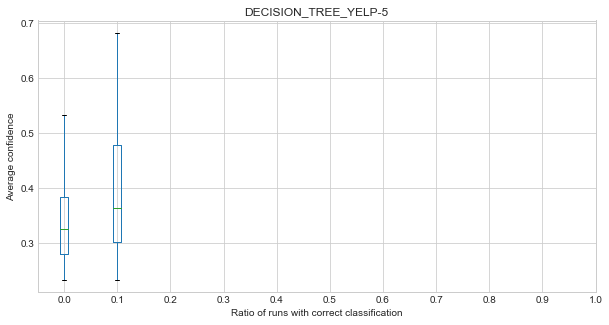

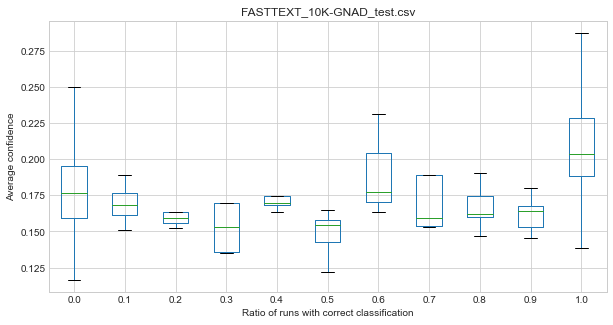

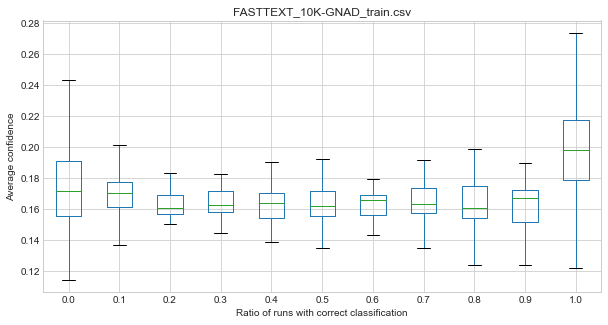

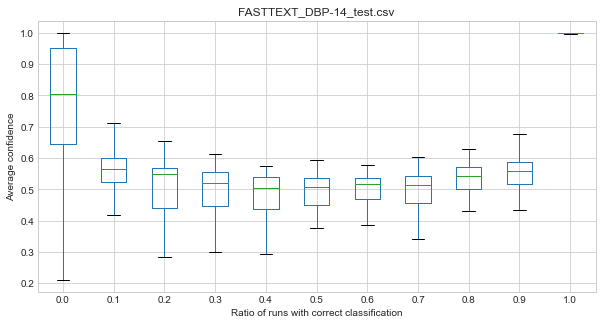

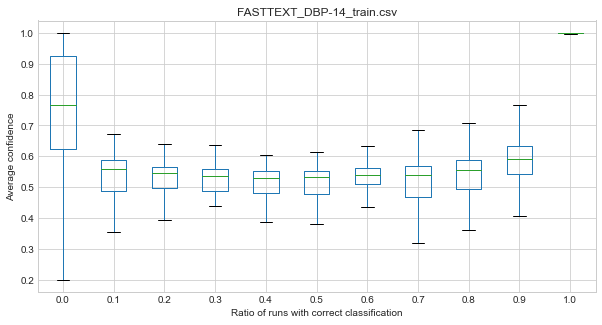

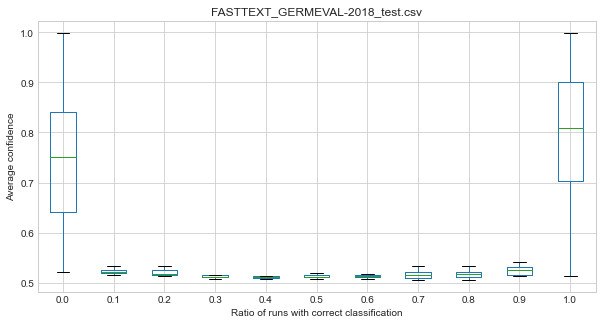

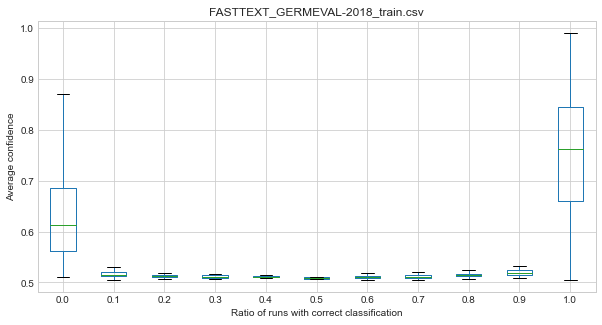

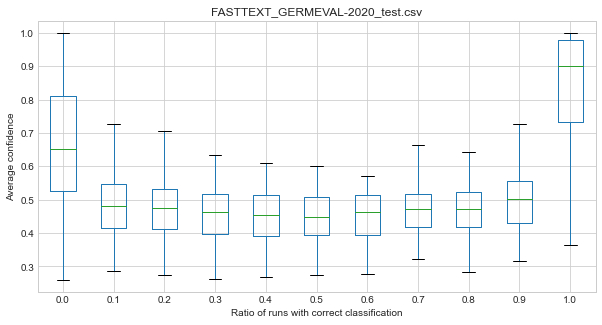

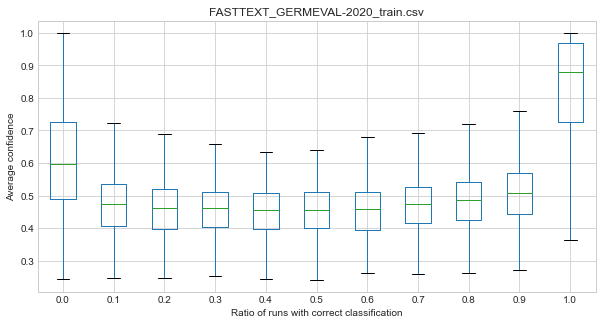

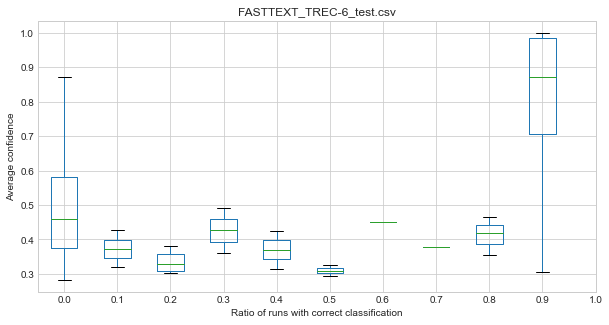

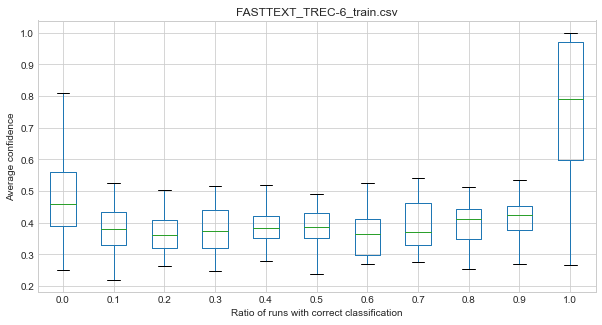

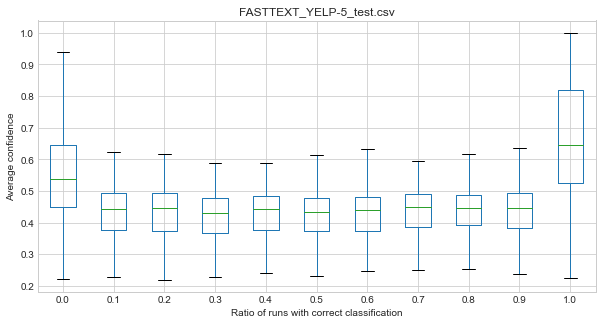

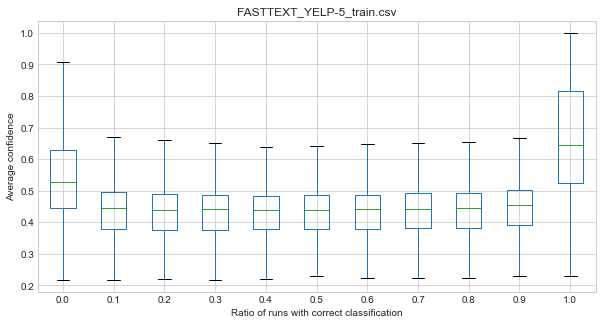

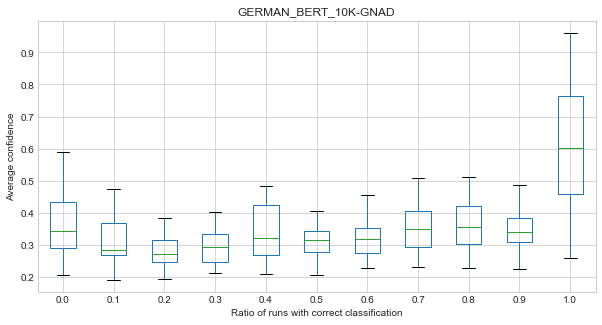

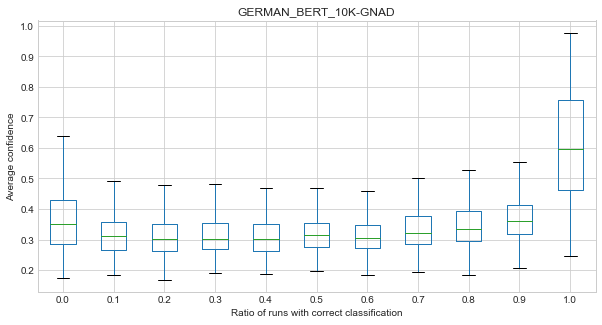

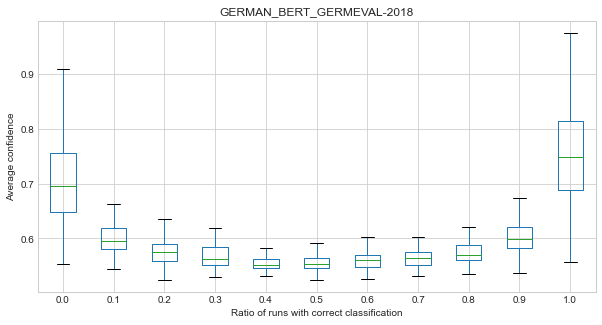

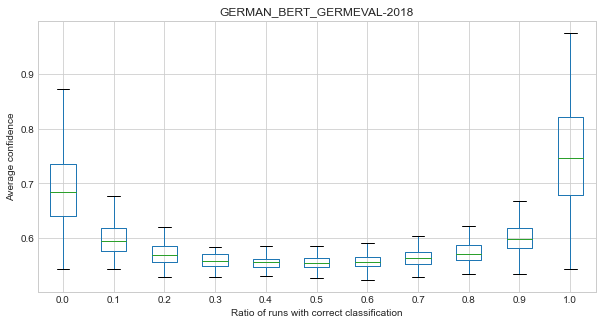

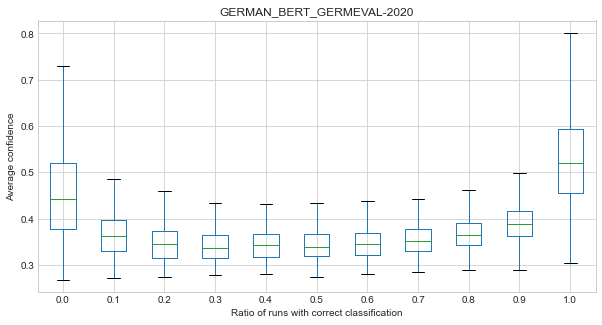

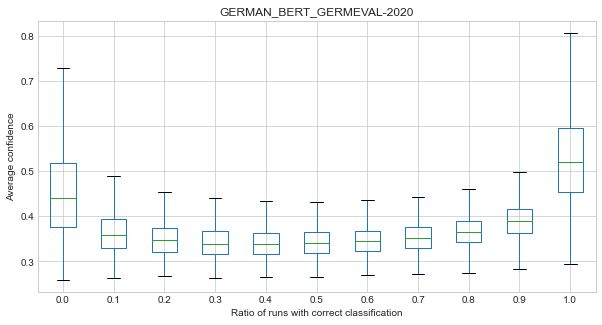

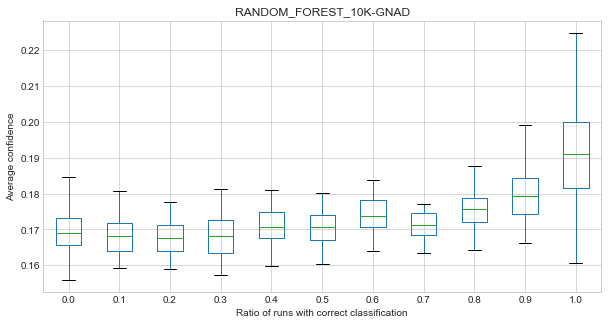

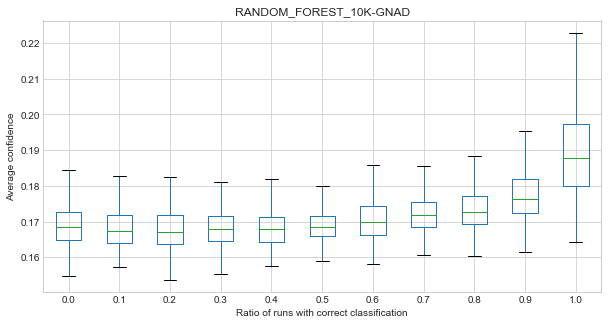

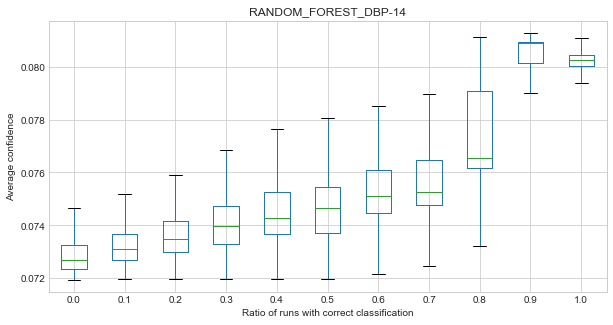

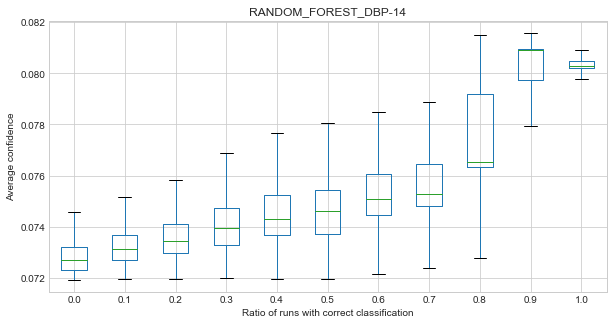

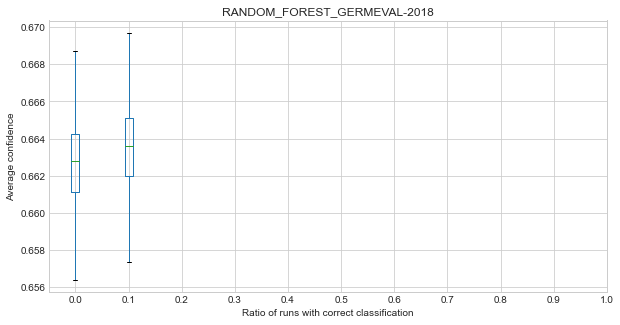

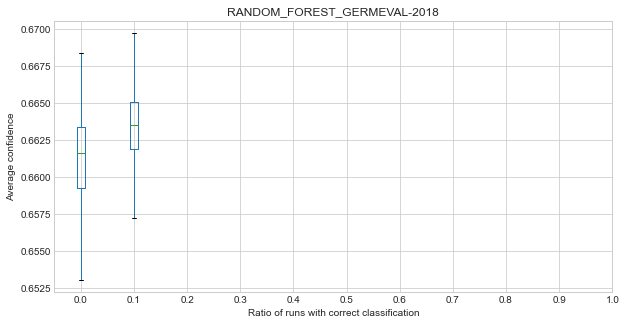

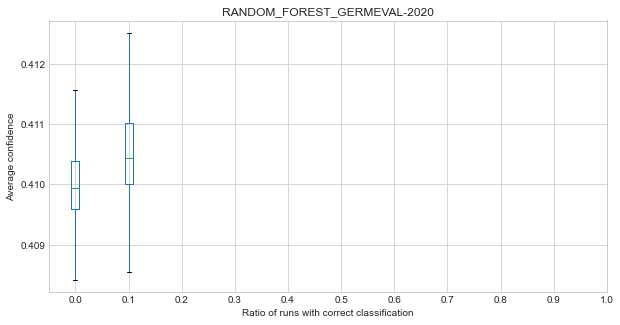

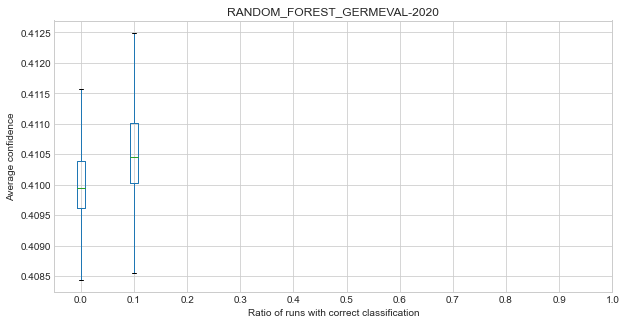

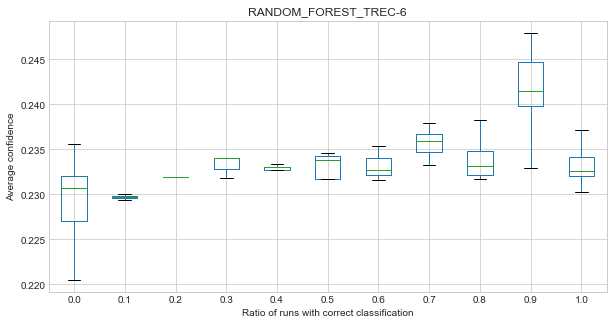

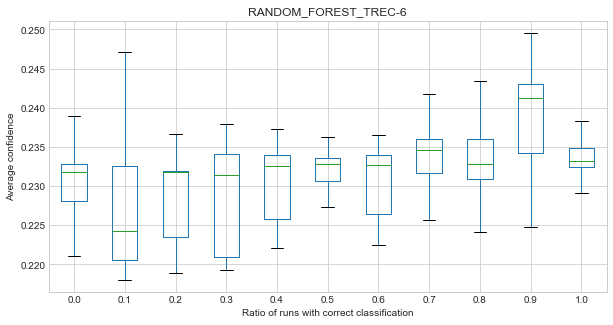

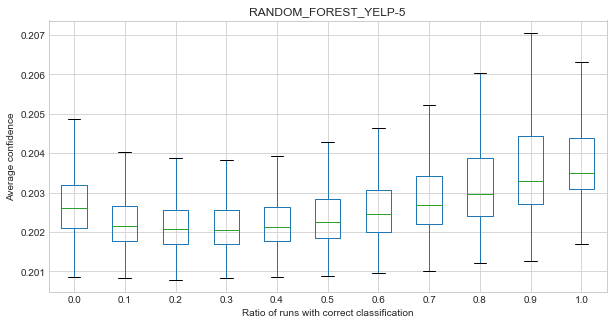

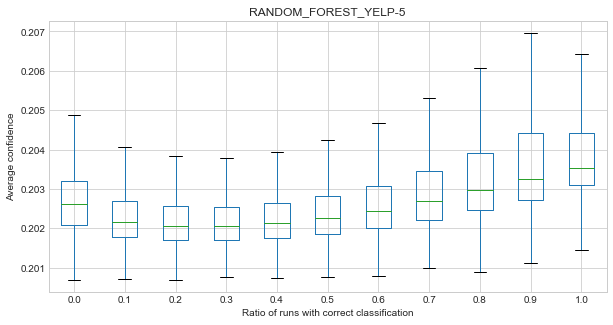

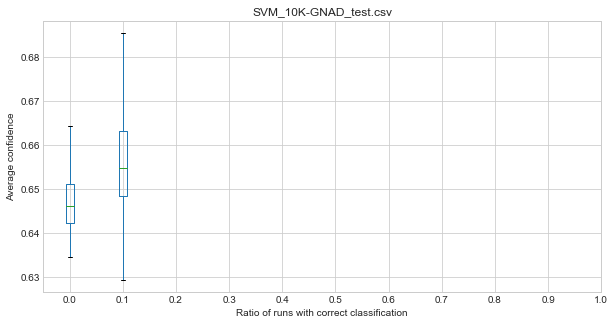

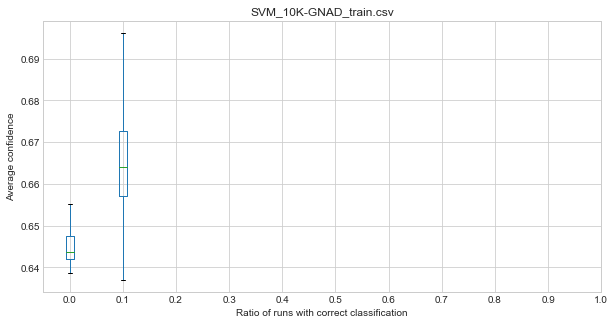

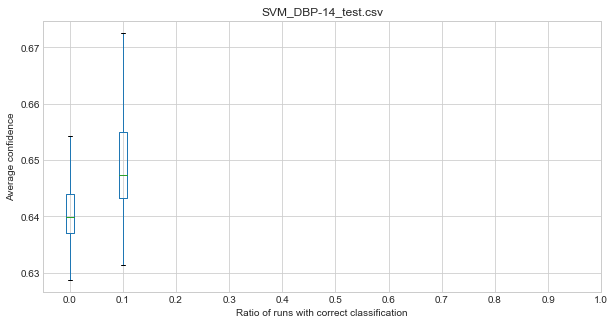

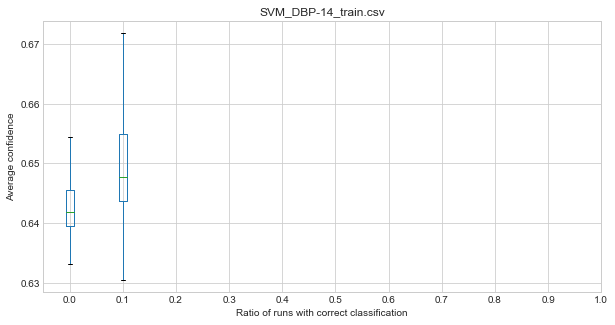

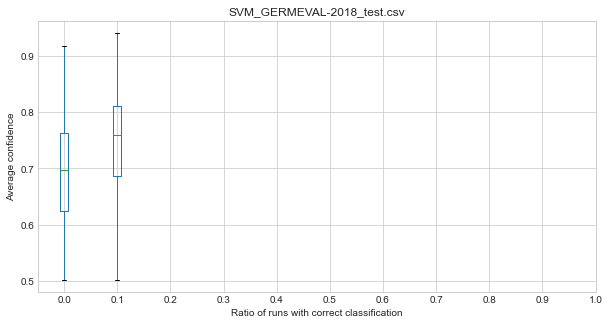

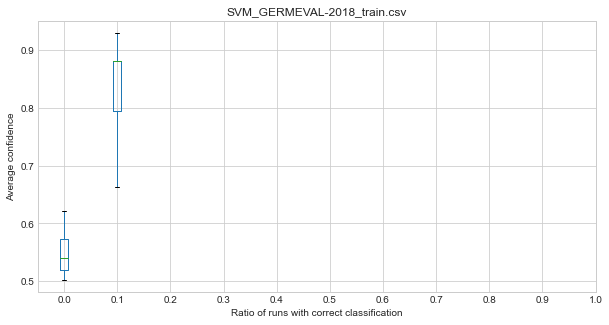

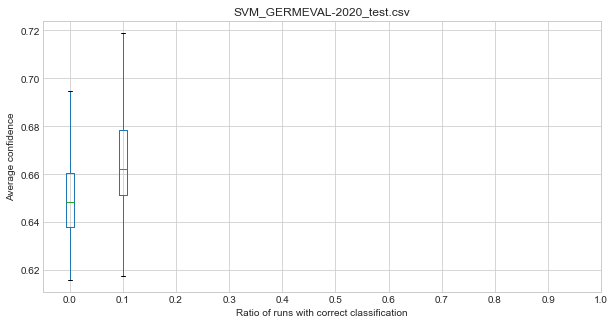

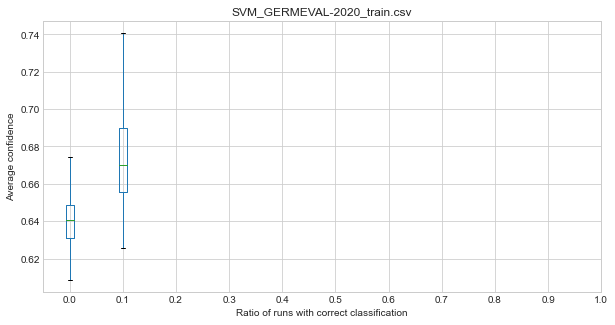

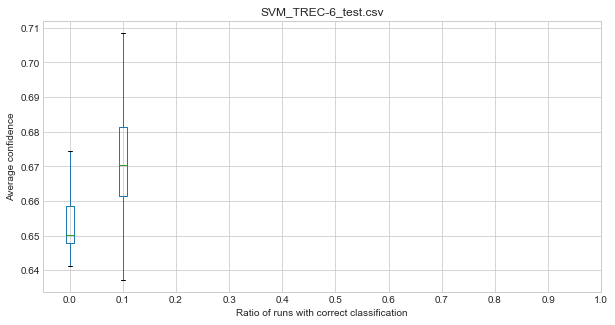

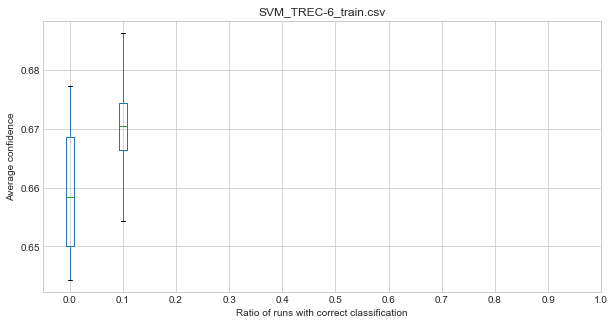

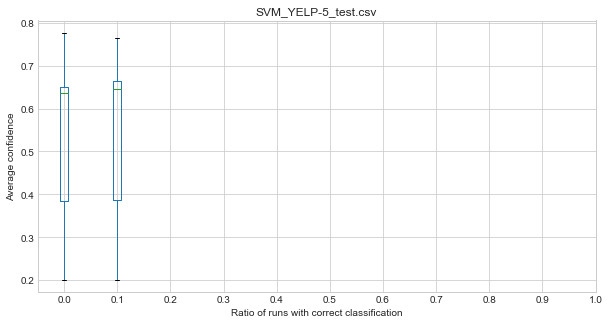

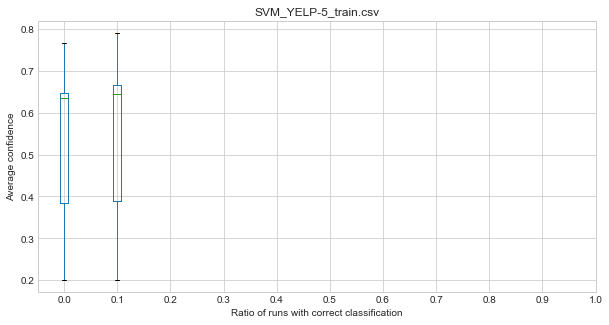

In [8]:
for file in glob('confidence/confidence*.csv'):
    title = '_'.join(file.split('_')[1:4])
    plot_certainty_ptrue(pd.read_csv(file), title)